#### Imports

In [1]:
import mne
import os
import pandas

from IPython.display import clear_output

#### Load Metadata

Change 'originalPATH' to path where Metadata files are located (and 'excelPATH' to save location of excel files).\
Option to put .txt files into Excel files


In [2]:
DataList = ["cdi", "children", "CODES_overview", "parents"]
MetaData = [None] * len(DataList)

MakeExcelFiles = True

for i, DataFile in enumerate(DataList):
    originalPATH = "D:\\EEG Data\\EEG New Dataset Additional Data\\" + DataFile + '.txt'    
    if os.path.exists(originalPATH):  
        MetaData[i] = pandas.read_table(originalPATH)

        if(MakeExcelFiles):
            excelPATH = './Excel Files\\' + DataFile + '.xlsx'
            if os.path.exists(excelPATH):
                os.remove(excelPATH)            
            MetaData[i].to_excel(excelPATH)
            
    else: print("PATH NOT FOUND:  " + originalPATH) 

MetaData[0] = cdi.txt\
MetaData[1] = children.txt\
MetaData[2] = CODES_overview.txt\
MetaData[3] = parents.txt

#### Load EEG files
Change path os.walk to parent of folder that contain .bdf files

In [5]:
EEG = []

EEG_filenames = []
EEG_filelocation = []

for root, dirs, files in os.walk("D:\\EEG Data\\EEG New Dataset\\"):
    for file in files:
        if file.endswith('.bdf') and len(file) == 8:
            BdfFile = mne.io.read_raw_bdf(root+'\\'+file)
            EEG.append(BdfFile)  
            
            EEG_filenames.append(file)
            EEG_filelocation.append(root+'\\'+file)
            clear_output(wait=True)
            
print(str(len(EEG)) + " files loaded")

119 files loaded


#### Show EEG Info

In [32]:
index = 7
PrintEEGInfo = True
if(PrintEEGInfo):
    print('File Location: ',EEG_filelocation[index],'\n')
    print(EEG[index],'\n')
    print(EEG[index].info)

File Location:  D:\EEG Data\EEG New Dataset\104\104b\104b.bdf 

<RawEDF | 104b.bdf, 41 x 3794944 (1853.0 s), ~44 kB, data not loaded> 

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-06-11 09:31:48 UTC
 nchan: 41
 projs: []
 sfreq: 2048.0 Hz
>


#### Find Event markers

In [12]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

index = 51
indexEvent = mne.find_events(EEG[index], initial_event = True)

# # Takes a while to load:
# for i in range(len(EEG)):
#     event = mne.find_events(EEG[i], initial_event = True)
#     EEG_events.append(event)

2441 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 101 102 103 104 105 106]


In [19]:
print(indexEvent[:100])

[[     0      0      4]
 [ 22765      0      2]
 [ 24198      0      2]
 [ 25632      0      6]
 [ 27106      0     11]
 [ 28642      0      2]
 [ 30096      0     12]
 [ 31550      0     11]
 [ 33004      0      8]
 [ 34581      0      5]
 [ 35974      0      1]
 [ 37387      0     24]
 [ 38882      0     13]
 [ 40398      0     16]
 [ 41892      0     23]
 [ 43388      0     22]
 [ 44862      0     21]
 [ 46316      0     27]
 [ 47770      0      5]
 [ 49224      0     24]
 [ 50740      0     20]
 [ 52214      0     18]
 [ 53730      0     14]
 [ 55266      0     16]
 [ 56761      0     14]
 [ 58297      0     20]
 [ 59874      0     33]
 [ 61430      0     10]
 [ 63007      0     15]
 [ 64420      0     27]
 [ 65874      0      3]
 [ 67328      0     22]
 [ 68803      0     14]
 [ 70195      0     16]
 [ 71608      0     14]
 [ 73042      0     14]
 [ 74435      0     36]
 [ 75950      0      2]
 [ 77466      0     13]
 [ 78981      0     15]
 [ 80476      0     22]
 [ 81910      0 

#### Plot EEG
Install dependencies if tool for external window %matplotlib qt doesn't work.

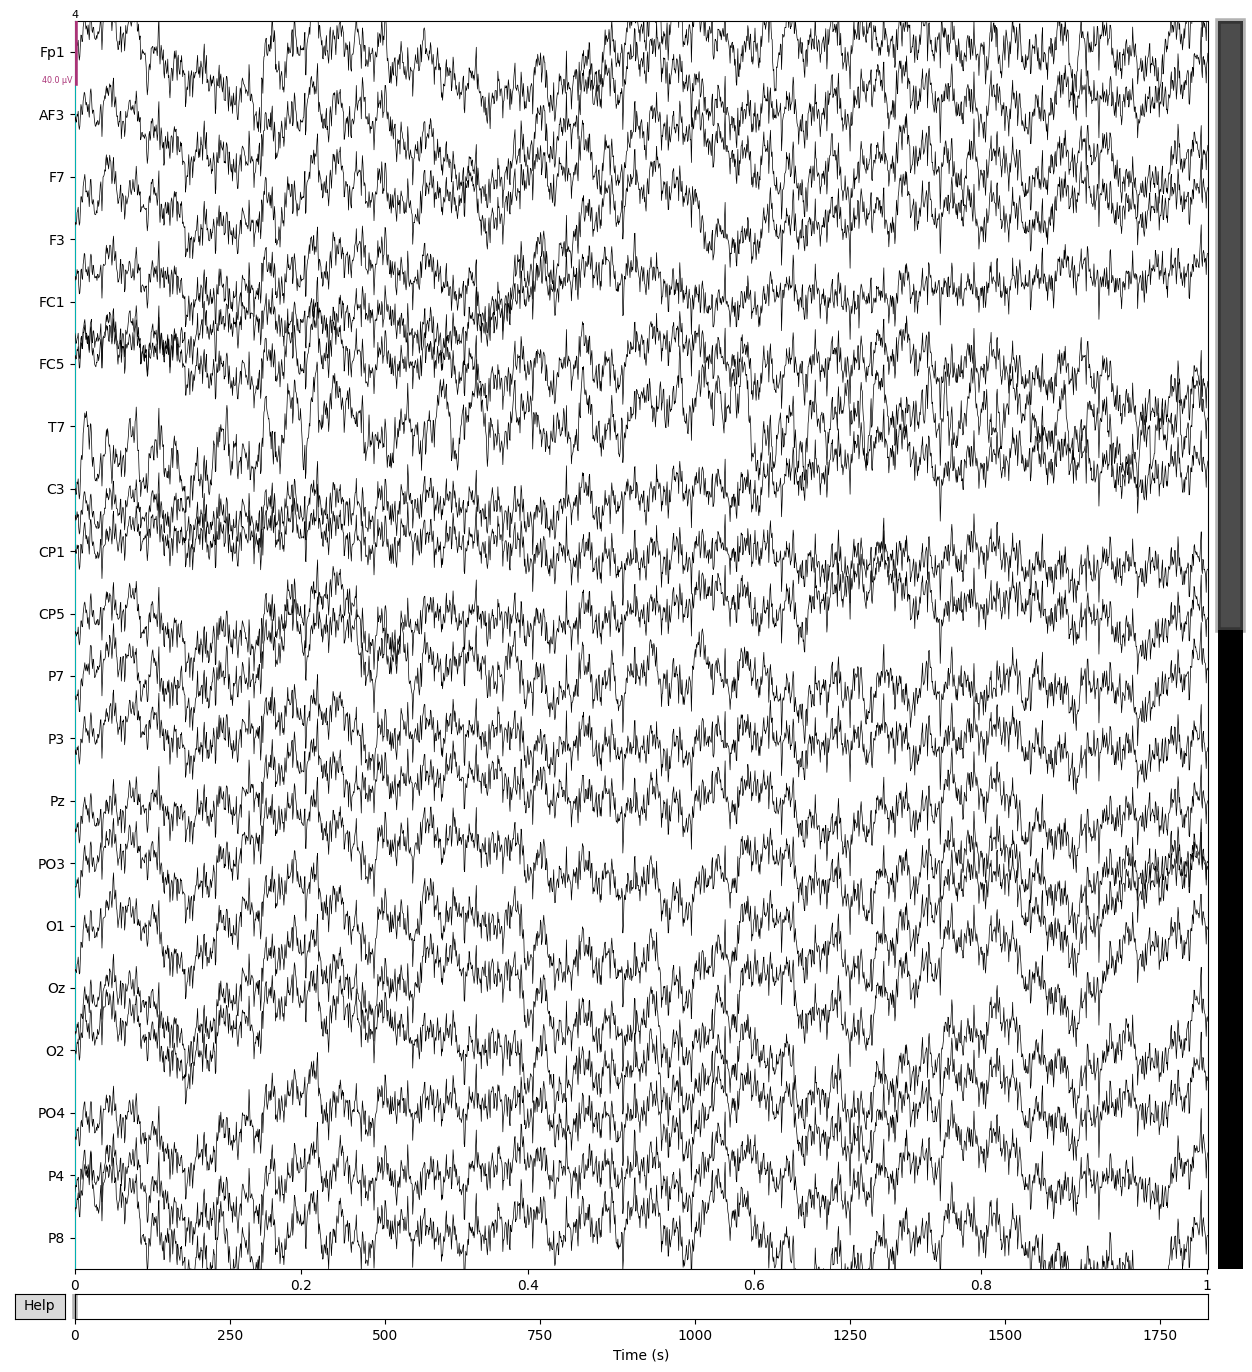

In [20]:
%matplotlib qt
EEG[index].plot(events = indexEvent, duration=1)


In [60]:
mne.find_events(EEG[51])

Trigger channel has a non-zero initial value of 4 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2440 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 101 102 103 104 105 106]


array([[  22765,       0,       2],
       [  24198,       0,       2],
       [  25632,       0,       6],
       ...,
       [3722637,       0,     105],
       [3724153,       0,     105],
       [3725689,       0,     105]], dtype=int64)